In [18]:
import pandas as pd
from ShipDataset import rle_decode
from ShipDataset import ShipDataset
import ShipUtils as utils

img_dir = "/host/work/kaggle/airbus_ship/data/train/"
csv_file = "/host/work/kaggle/airbus_ship/data/train_ship_segmentations.csv"

train_set = ShipDataset(csv_file, img_dir)

print("{} images are available".format(len(train_set)))

104070 images are available


In [19]:
# try load a couple of images
imgs = []
masks = []

for i in range(0,5):
    img, mask = train_set[i]
    imgs.append(img)
    masks.append(mask)
print("{}/{} images are loaded from dataset".format(len(imgs), len(masks)))


5/5 images are loaded from dataset


In [20]:
# Generate footprint
import os
out_dir = "/host/work/kaggle/airbus_ship/data/train_footprint/"

img_name = "00021ddc3.jpg"
img, bbox = train_set.get_footprint(img_name)
for b in bbox:
    print(b)

foot_dict = utils.generate_footprint(img_name, bbox)
for k, v in foot_dict.items():
    print(k)
    print(v)
    
from PIL import Image, ImageDraw
img_file = os.path.join(train_set.img_dir, img_name)
im = Image.open(img_file)
draw = ImageDraw.Draw(im)
for k, foot in foot_dict.items():
    for v in foot:
        ele = v.split(' ')
        poly = []
        for i in range(0, 4):
            poly.append(((int)(ele[2*i]), (int)(ele[2*i+1])))
        print(poly)
        draw.polygon(poly, outline = (255,0,0,255))
im.save(os.path.join(out_dir, img_name))

            
            
#         draw.polygon([(int_pt[0]-5, int_pt[1]), (int_pt[0]+5, int_pt[1])], fill = color, width = 2)

# img_names = []
# bboxes = []
# for i, img_name in enumerate(train_set.img_names):
#     if i > 10:
#         break
#     img_names.append(img_name)
#     img, box = train_set.get_footprint(img_name)
#     bboxes.append(box)

# footprint_dict = utils.generate_footprint(img_names, bboxes)

# for k, v in footprint_dict.iteritems():
#     print(k)
#     print(v)

    

(131, 732, 168, 762)
(123, 755, 136, 767)
(96, 715, 107, 720)
(195, 661, 201, 665)
(181, 629, 187, 638)
(112, 708, 121, 713)
(96, 710, 112, 717)
(98, 705, 112, 712)
(140, 740, 178, 768)
Inside
00021ddc3.jpg
['131 732 168 732 168 762 131 762 ship 1', '123 755 136 755 136 767 123 767 ship 1', '96 715 107 715 107 720 96 720 ship 1', '195 661 201 661 201 665 195 665 ship 1', '181 629 187 629 187 638 181 638 ship 1', '112 708 121 708 121 713 112 713 ship 1', '96 710 112 710 112 717 96 717 ship 1', '98 705 112 705 112 712 98 712 ship 1', '140 740 178 740 178 768 140 768 ship 1']
[(131, 732), (168, 732), (168, 762), (131, 762)]
[(123, 755), (136, 755), (136, 767), (123, 767)]
[(96, 715), (107, 715), (107, 720), (96, 720)]
[(195, 661), (201, 661), (201, 665), (195, 665)]
[(181, 629), (187, 629), (187, 638), (181, 638)]
[(112, 708), (121, 708), (121, 713), (112, 713)]
[(96, 710), (112, 710), (112, 717), (96, 717)]
[(98, 705), (112, 705), (112, 712), (98, 712)]
[(140, 740), (178, 740), (178, 768

In [ ]:
# plot ship mask
import numpy as np
import matplotlib.pyplot as plt
img_name = "00021ddc3.jpg"

img, mask = train_set.get_image(img_name)
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()
# df = train_set.df

# ser = df.loc[df['ImageId'] == img_name]
# val = ser.EncodedPixels.values
# print(type(val))
# print(len(val))

# m_all = []
# print(imgs[0].shape[0:2])
# for v in val:
#     if pd.isna(v):
#         m = np.zeros( (imgs[0].shape[0:2]), dtype=img.dtype)
#     else:
#         m = rle_decode(v, (imgs[0].shape[0:2]), 255)
#     print(type(m))
#     m_all.append(m)

# sum_mask = m_all[0]
# for i in range(1, len(m_all)):
#     sum_mask = np.add(sum_mask, m_all[i])
# sum_mask[sum_mask > 0] = 255

# print(sum_mask.shape)

# plt.imshow(sum_mask)
# plt.show()
# img_file = "/host/work/kaggle/airbus_ship/data/train/00021ddc3.jpg"
# from PIL import Image
# img = np.asarray(Image.open(img_file))
# plt.imshow(img)
# plt.show()
# print(np.amax(sum_mask))

[[664.49803922 200.        ]
 [664.49803922 199.        ]
 [664.49803922 198.        ]
 [664.         197.50196078]
 [663.49803922 197.        ]
 [663.49803922 196.        ]
 [663.49803922 195.        ]
 [663.         194.50196078]
 [662.         194.50196078]
 [661.50196078 195.        ]
 [661.         195.50196078]
 [660.50196078 196.        ]
 [660.50196078 197.        ]
 [660.50196078 198.        ]
 [661.         198.49803922]
 [661.50196078 199.        ]
 [661.50196078 200.        ]
 [662.         200.49803922]
 [663.         200.49803922]
 [664.         200.49803922]
 [664.49803922 200.        ]]


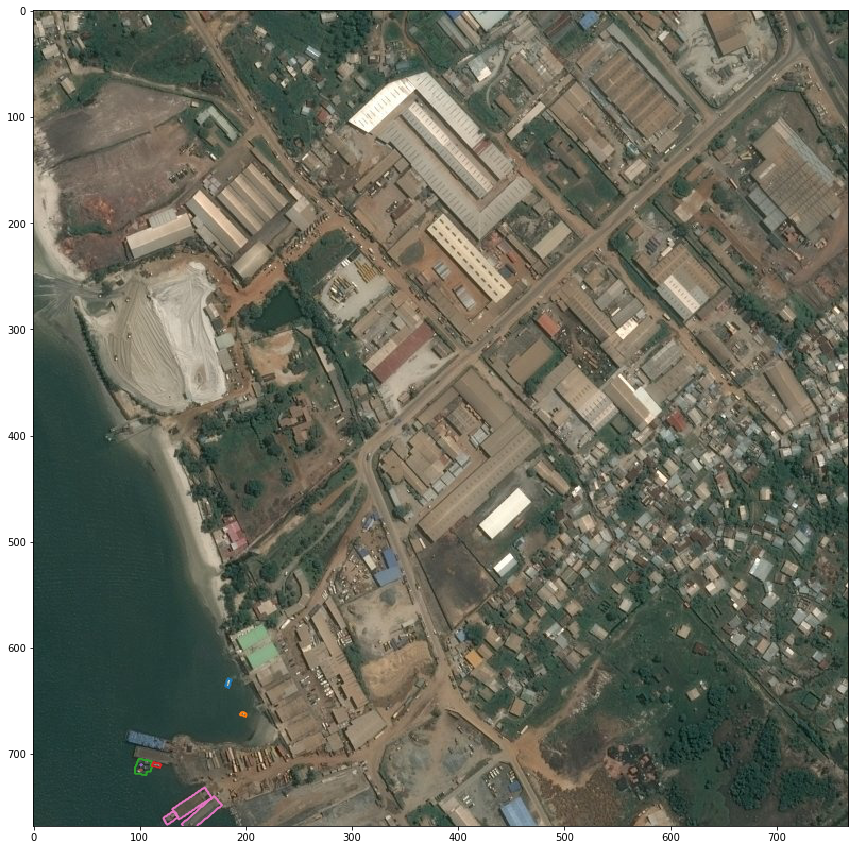

In [17]:
# try to convert mask to footprint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

img, mask = train_set.get_image(img_name)

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, find_contours
from skimage.morphology import closing, square
from skimage.color import label2rgb

label_img = label(mask)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

contours = find_contours(mask, 128)
for n, c in enumerate(contours):
    ax.plot(c[:, 1], c[:, 0], linewidth=2)
    if n == 1:
        print(c)

plt.show()


# for region in regionprops(label_img):
#     # take regions with large enough areas
#     if region.area >= 0:
#         # draw rectangle around segmented coins
#         minr, minc, maxr, maxc = region.bbox
#         rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
#                                   fill=False, edgecolor='red', linewidth=2)
#         ax.add_patch(rect)

In [ ]:
ser = train_set.df.loc[train_set.df['ImageId'] == img_name]
print(ser)